In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import month_plot,quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error

In [114]:
df = pd.read_csv("C:\\Projects\\Time_series\\Bitcoin-prices\\ARIMA, SARIMA and SARIMAX\\daily_revenue.csv",index_col="date", parse_dates=True,dayfirst=True)
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1795 entries, 2018-01-01 to 2022-11-30
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   revenue        1795 non-null   object
 1   discount_rate  1795 non-null   object
 2   coupon_rate    1795 non-null   object
dtypes: object(3)
memory usage: 56.1+ KB


In [115]:
df['revenue'] = df['revenue'].str.replace(',',"").astype(float)

In [116]:
#setting frquencey
df = df.asfreq("D")

In [117]:
# change the time series variable name
df = df.rename(columns={'revenue':'y'}
               )
df.head()

,y,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


Exploratory Data Analysis

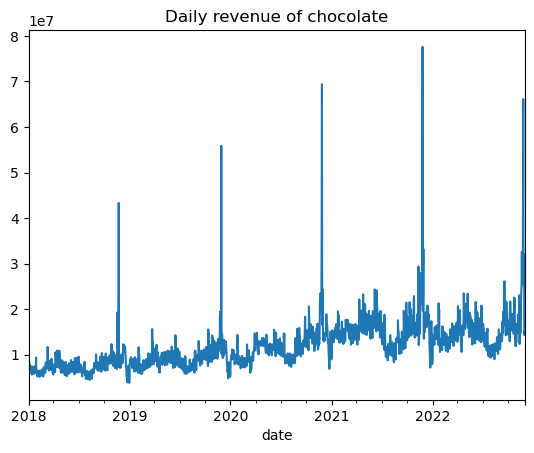

In [118]:
df['y'].plot(title="Daily revenue of chocolate")
plt.show()

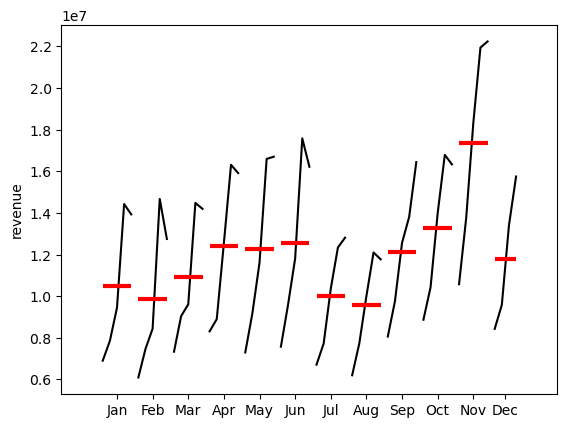

In [9]:
# plotting the monthyly seasonality 
month_plot(df['y'].resample('ME').mean(), ylabel='revenue')
plt.show()

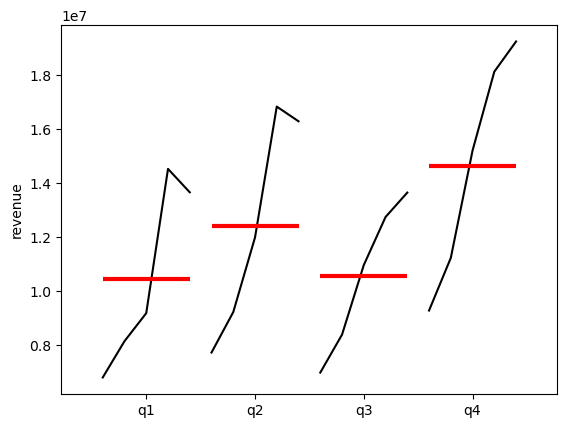

In [10]:
quarter_plot(df['y'].resample('QE').mean(),ylabel="revenue")
plt.show()

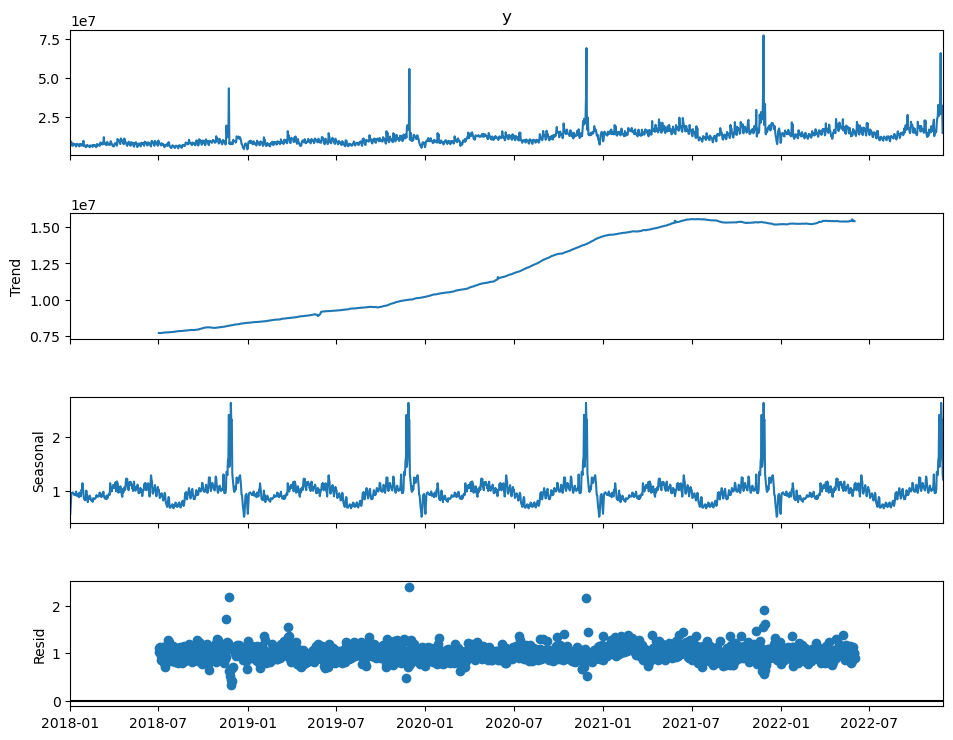

In [11]:
#seasonal Decomposition plots for chocolate revnue
decomposition = seasonal_decompose(df['y'],
                                   model = 'mul',
                                   period=365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

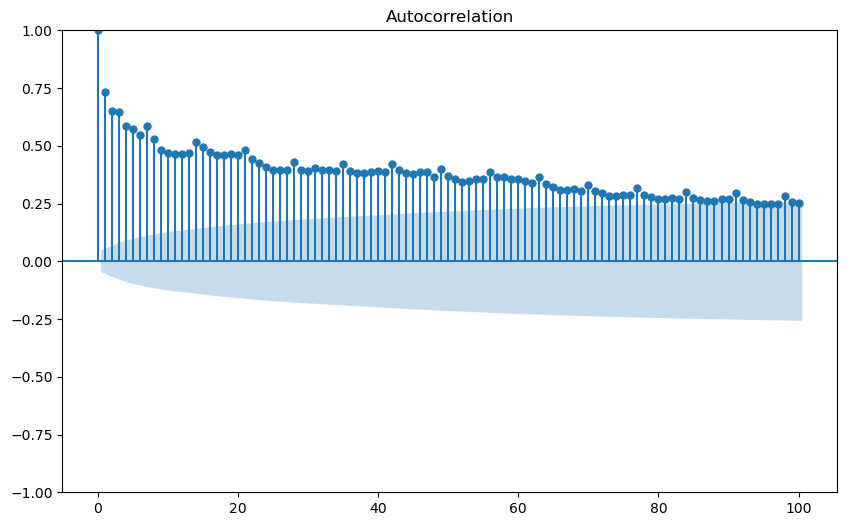

In [12]:
# plot the autocorrelation (ACF) 
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['y'],lags=100, ax=ax)
plt.show()


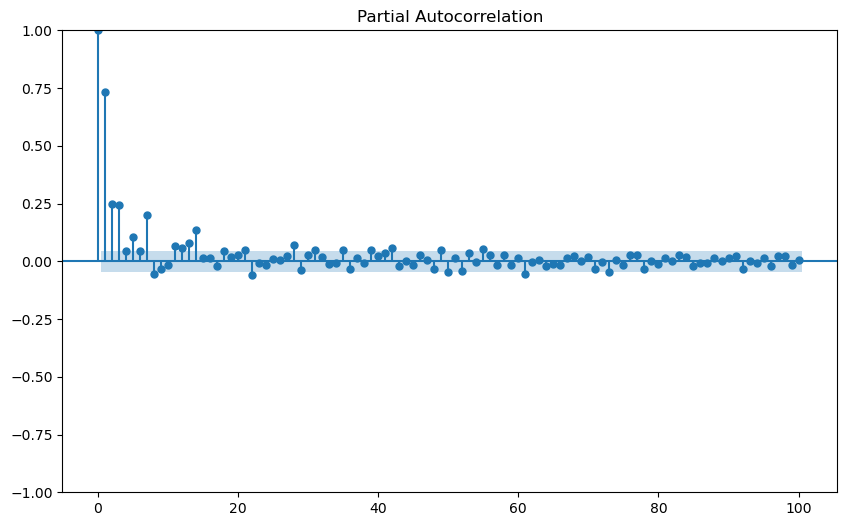

In [13]:
# plot the partial autocorrelation (PACF)
fig,ax = plt.subplots(figsize=(10,6))
plot_pacf(df['y'],lags=100,ax=ax)
plt.show()

In [14]:

# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions, squared = False)
  mape = mean_absolute_percentage_error(test, predictions)

  # print the metrics value
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Plot training, test, and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # print the metrics value
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

In [18]:
# Function to plot the future
def plot_future(y, forecast, title):
  # Plot training and forecasts
  plt.figure(figsize = (10,4))
  plt.plot(y, label = 'Train')
  plt.plot(forecast, label = "Forecast")
  plt.title(f"Train and Forecast with {title}")
  plt.legend()
  plt.show()

stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller 

result = adfuller(df.y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('critical Values:')

for key, value in result[4].items():
    print('t%s: %.3f' % (key,value))

#interpreting the results 

if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary")
else:
    print("evidence suggests that the time series is non-stationary")

ADF Statistic: -2.558400
p-value: 0.101904
critical Values:
t1%: -3.434
t5%: -2.863
t10%: -2.568
evidence suggests that the time series is non-stationary


In [16]:
# If non-stationary, take the first difference
df['y_diff'] = df['y'].diff()
df['y_diff']


date
2018-01-01           NaN
2018-01-02     2651237.0
2018-01-03     -475975.0
2018-01-04     -660303.0
2018-01-05    -1410495.0
                 ...    
2022-11-26   -39180777.0
2022-11-27     4955921.0
2022-11-28      210050.0
2022-11-29   -17786305.0
2022-11-30      712049.0
Freq: D, Name: y_diff, Length: 1795, dtype: float64

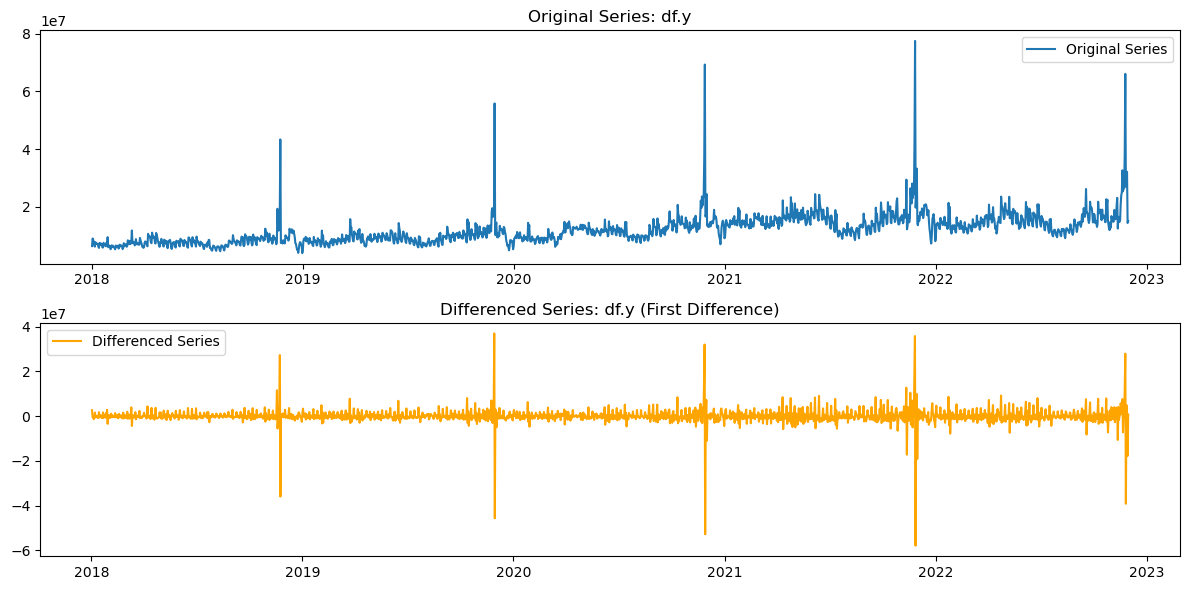

In [17]:

# Plot the original series and the differenced series
plt.figure(figsize=(12, 6))

# Plot the original series
plt.subplot(2, 1, 1)
plt.plot(df['y'], label='Original Series')
plt.title('Original Series: df.y')
plt.legend()

# Plot the differenced series
plt.subplot(2, 1, 2)
plt.plot(df['y_diff'], label='Differenced Series', color='orange')
plt.title('Differenced Series: df.y (First Difference)')
plt.legend()

plt.tight_layout()
plt.show()

ARIMA

In [51]:
# train and test split 
test_days = 30 
train, test =df.iloc[:-test_days], df.iloc[-test_days:]
train

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27,1.09,NaN
2018-01-02,8922076.0,30.87,1.08,2651237.0
2018-01-03,8446101.0,28.11,1.01,-475975.0
2018-01-04,7785798.0,27.32,0.96,-660303.0
2018-01-05,6375303.0,25.70,0.90,-1410495.0
...,...,...,...,...
2022-10-27,13714667.0,20.81,0.61,-1352362.0
2022-10-28,12100780.0,21.44,0.55,-1613887.0
2022-10-29,11849363.0,19.81,0.36,-251417.0


In [22]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 7.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from pmdarima import auto_arima, ARIMA , model_selection

In [28]:
# using pmdarima for the arima model  and the best parameters 

model = auto_arima(train['y'], seasonal=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1765
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -28817.267
Date:                Sat, 15 Feb 2025   AIC                          57650.535
Time:                        17:57:37   BIC                          57694.337
Sample:                    01-01-2018   HQIC                         57666.720
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4136      0.120     -3.449      0.001      -0.649      -0.179
ar.L2          0.3017      0.053      5.671      0.000       0.197       0.406
ar.L3          0.1570      0.028      5.705      0.000       0.103       0.211
ar.L4          0.0679      0.029      2.365      0.018       0.012       0.124
ar.L5          0.0466      0.024      1.937      0.053      -0.001       0.094
ma.L1         -0.1598      0.118     -1.354      0.176      -0.391       0.071
ma.L2         -0.7423      0.108     -6.872      0.000      -0.954      -0.531
sigma2      9.084e+12   1.86e-14   4.88e+26      0.000    9.08e+12    9.08e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            580903.26
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                             5.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.04e+41. Standard errors may be unstable.
"""

In [27]:
# predictions 
predictions_arima = model.predict(n_periods=len(test))
predictions_arima

2022-11-01    1.445299e+07
2022-11-02    1.474103e+07
2022-11-03    1.503283e+07
2022-11-04    1.527520e+07
2022-11-05    1.534078e+07
2022-11-06    1.553442e+07
2022-11-07    1.554542e+07
2022-11-08    1.563967e+07
2022-11-09    1.565016e+07
2022-11-10    1.569221e+07
2022-11-11    1.570256e+07
2022-11-12    1.571953e+07
2022-11-13    1.572734e+07
2022-11-14    1.573420e+07
2022-11-15    1.573904e+07
2022-11-16    1.574197e+07
2022-11-17    1.574462e+07
2022-11-18    1.574600e+07
2022-11-19    1.574734e+07
2022-11-20    1.574804e+07
2022-11-21    1.574869e+07
2022-11-22    1.574906e+07
2022-11-23    1.574937e+07
2022-11-24    1.574956e+07
2022-11-25    1.574971e+07
2022-11-26    1.574981e+07
2022-11-27    1.574988e+07
2022-11-28    1.574994e+07
2022-11-29    1.574997e+07
2022-11-30    1.575000e+07
Freq: D, dtype: float64

In [33]:
train['y']

date
2018-01-01     6270839.0
2018-01-02     8922076.0
2018-01-03     8446101.0
2018-01-04     7785798.0
2018-01-05     6375303.0
                 ...    
2022-10-27    13714667.0
2022-10-28    12100780.0
2022-10-29    11849363.0
2022-10-30    14561144.0
2022-10-31    12689026.0
Freq: D, Name: y, Length: 1765, dtype: float64

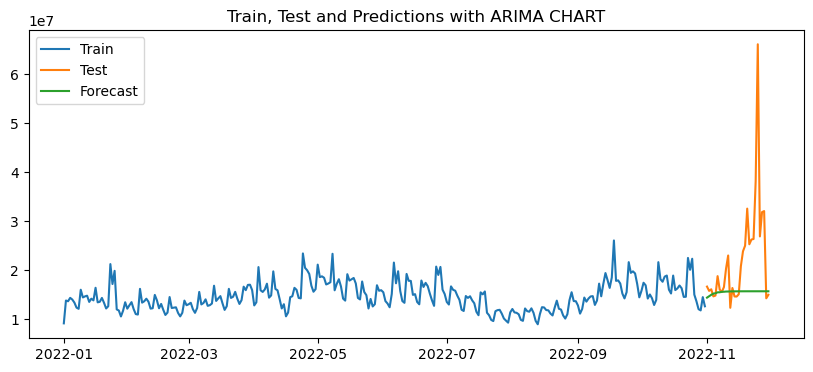

The MAE is 7267306.03
The RMSE is 12366038.30
The MAPE is 24.15 %


In [36]:
model_assessment(train['y']['2022':],test['y'],predictions_arima,"ARIMA CHART")

SARIMA

In [37]:
# using pmdarima for the arima model  and the best parameters 

model_sarima = auto_arima(train['y'], m=7)
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(3, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28762.051
Date:                           Mon, 17 Feb 2025   AIC                          57546.103
Time:                                   09:58:10   BIC                          57606.331
Sample:                               01-01-2018   HQIC                         57568.358
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   4682.841      2.150      0.032     890.119    1.92e+04
ar.L1         -0.3476      0.072     -4.796      0.000      -0.490      -0.206
ar.L2          0.1856      0.032      5.721      0.000       0.122       0.249
ar.L3          0.1034      0.016      6.523      0.000       0.072       0.135
ma.L1         -0.1959      0.074     -2.656      0.008      -0.340      -0.051
ma.L2         -0.5684      0.060     -9.397      0.000      -0.687      -0.450
ar.S.L7        0.0805      0.181      0.445      0.656      -0.274       0.435
ar.S.L14       0.8713      0.172      5.069      0.000       0.534       1.208
ma.S.L7       -0.0035      0.176     -0.020      0.984      -0.349       0.342
ma.S.L14      -0.8322      0.157     -5.308      0.000      -1.139      -0.525
sigma2      9.294e+12      0.000   8.85e+16      0.000    9.29e+12    9.29e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            848680.07
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                             5.24
Prob(H) (two-sided):                  0.00   Kurtosis:                       109.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.16e+31. Standard errors may be unstable.
"""

In [38]:
# predictioms
predictions_sarima = model_sarima.predict(n_periods = len(test))
predictions_sarima

2022-11-01    1.513405e+07
2022-11-02    1.504532e+07
2022-11-03    1.464451e+07
2022-11-04    1.382173e+07
2022-11-05    1.397989e+07
2022-11-06    1.697862e+07
2022-11-07    1.583309e+07
2022-11-08    1.605213e+07
2022-11-09    1.575795e+07
2022-11-10    1.523579e+07
2022-11-11    1.428013e+07
2022-11-12    1.448972e+07
2022-11-13    1.761293e+07
2022-11-14    1.658418e+07
2022-11-15    1.682754e+07
2022-11-16    1.635481e+07
2022-11-17    1.582111e+07
2022-11-18    1.482090e+07
2022-11-19    1.499249e+07
2022-11-20    1.780777e+07
2022-11-21    1.673573e+07
2022-11-22    1.694584e+07
2022-11-23    1.665824e+07
2022-11-24    1.616890e+07
2022-11-25    1.526406e+07
2022-11-26    1.546995e+07
2022-11-27    1.842696e+07
2022-11-28    1.745381e+07
2022-11-29    1.769222e+07
2022-11-30    1.726669e+07
Freq: D, dtype: float64

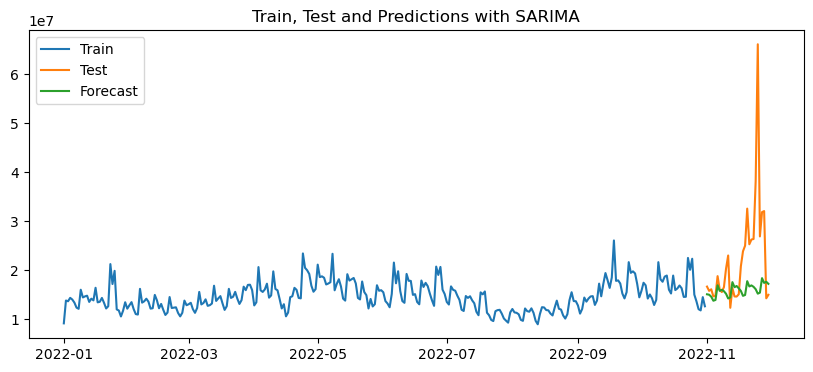

The MAE is 7210571.04
The RMSE is 12152419.85
The MAPE is 24.54 %


In [39]:
# model assessment 
model_assessment(train['y']['2022':], test['y'], predictions_sarima,"SARIMA")

SARIMAX

In [41]:
df.columns

Index(['y', 'discount_rate', 'coupon_rate', 'y_diff'], dtype='object')

In [42]:
df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27%,1.09%,NaN
2018-01-02,8922076.0,30.87%,1.08%,2651237.0
2018-01-03,8446101.0,28.11%,1.01%,-475975.0
2018-01-04,7785798.0,27.32%,0.96%,-660303.0
2018-01-05,6375303.0,25.70%,0.90%,-1410495.0


In [43]:
# transform regressors into floats
df['discount_rate'] = df ['discount_rate'].str.replace("%","").astype('float')
df['coupon_rate'] = df ['coupon_rate'].str.replace("%","").astype('float')


In [44]:
df.head()

,y,discount_rate,coupon_rate,y_diff
date,,,,
2018-01-01,6270839.0,34.27,1.09,NaN
2018-01-02,8922076.0,30.87,1.08,2651237.0
2018-01-03,8446101.0,28.11,1.01,-475975.0
2018-01-04,7785798.0,27.32,0.96,-660303.0
2018-01-05,6375303.0,25.70,0.90,-1410495.0


In [52]:
# split the regressor data into training and test 

test_days =30 
exog_train , exog_test =df.iloc[:-test_days,1:3], df.iloc[-test_days:,1:3]
exog_test.head()

,discount_rate,coupon_rate
date,,
2022-11-01,23.85,1.50
2022-11-02,20.76,0.94
2022-11-03,21.85,0.92
2022-11-04,20.17,0.88
2022-11-05,17.85,0.41


In [53]:
# using pmdarima for  the sarima model and the best parameters 
model_sarimax = auto_arima(train['y'],m=7,X=exog_train)
model_sarimax.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1765
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 7)   Log Likelihood              -28613.022
Date:                           Mon, 17 Feb 2025   AIC                          57250.045
Time:                                   10:15:05   BIC                          57315.749
Sample:                               01-01-2018   HQIC                         57274.324
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1.641e+04   7883.035      2.082      0.037     960.255    3.19e+04
discount_rate   4.03e+05   2.35e+04     17.127      0.000    3.57e+05    4.49e+05
coupon_rate    9.229e+05   6.12e+04     15.083      0.000    8.03e+05    1.04e+06
ar.L1            -0.6529      0.155     -4.205      0.000      -0.957      -0.349
ar.L2             0.1830      0.048      3.774      0.000       0.088       0.278
ma.L1             0.1070      0.155      0.692      0.489      -0.196       0.410
ma.L2            -0.6926      0.124     -5.577      0.000      -0.936      -0.449
ar.S.L7           0.0522      0.187      0.279      0.780      -0.315       0.419
ar.S.L14          0.9000      0.178      5.064      0.000       0.552       1.248
ma.S.L7           0.0183      0.183      0.100      0.920      -0.340       0.376
ma.S.L14         -0.8501      0.161     -5.289      0.000      -1.165      -0.535
sigma2         7.655e+12      0.016   4.73e+14      0.000    7.65e+12    7.65e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):           1075240.92
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             5.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.89e+28. Standard errors may be unstable.
"""

In [55]:
# predictions 
predictions_sarimax = model_sarimax.predict(n_periods = len(test), X=exog_test)
predictions_sarimax

2022-11-01    1.675205e+07
2022-11-02    1.494550e+07
2022-11-03    1.488437e+07
2022-11-04    1.296420e+07
2022-11-05    1.205475e+07
2022-11-06    1.394980e+07
2022-11-07    1.341738e+07
2022-11-08    1.328253e+07
2022-11-09    1.441185e+07
2022-11-10    2.077585e+07
2022-11-11    2.121854e+07
2022-11-12    1.346323e+07
2022-11-13    1.489115e+07
2022-11-14    1.299918e+07
2022-11-15    1.348076e+07
2022-11-16    1.398034e+07
2022-11-17    1.803901e+07
2022-11-18    1.675108e+07
2022-11-19    1.712315e+07
2022-11-20    1.980782e+07
2022-11-21    1.847900e+07
2022-11-22    1.908223e+07
2022-11-23    1.913623e+07
2022-11-24    2.068902e+07
2022-11-25    1.926284e+07
2022-11-26    1.851265e+07
2022-11-27    2.073227e+07
2022-11-28    2.607969e+07
2022-11-29    1.588260e+07
2022-11-30    1.479931e+07
Freq: D, dtype: float64

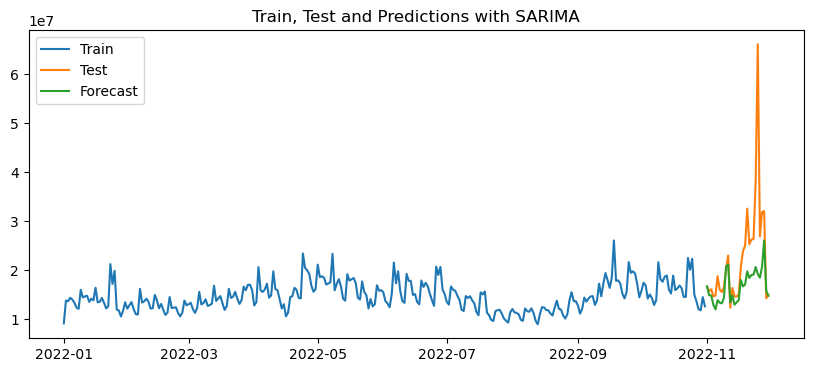

The MAE is 5716548.22
The RMSE is 10394615.20
The MAPE is 19.36 %


In [56]:
#model assessment 
model_assessment(train['y']['2022':], test['y'], predictions_sarimax, "SARIMA")

# Cross Validation

In [75]:
# define the model to do CV 
model_cv = ARIMA(order = (2,1,2),seasonal_order=(2,0,2,7))

In [84]:
# set the CV rules 
cv = model_selection.RollingForecastCV(h = 30,
                                       step=15,
                                       initial = df.shape[0]-180)

In [85]:
# inputs for the CV
cv_score = model_selection.cross_val_score(model_cv, y=df['y'],
                                           X= df.iloc[:,1:3],
                                           scoring= 'mean_squared_error',
                                           cv=cv,
                                           verbose = 1,
                                           error_score = 1000000000000000000000000)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\ProgramData\anaconda3\Lib\s

In [86]:
# CV performance 
import numpy as np
rmse = np.sqrt(np.average(cv_score ))
rmse

4437819.627423135

Parameters tunning 

In [87]:
# defining the paramterts 
from sklearn.model_selection import ParameterGrid

param_grid = { 'p': [1,2,3],
              'd': [0,1],
              'q': [1,2],
              'P':[1,2],
              'D':[0],
              'Q': [1,2]}

grid = ParameterGrid(param_grid)
list(grid)

[{'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 1, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 2, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 2, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 3, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'p': 3, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 1, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 2, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 2, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 3, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 1, 'd': 1, 'p': 3, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 1, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 2, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 2, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 3, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'p': 3, 'q': 2},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 1, 'p': 1, 'q': 1},
 {'D': 0, 'P': 1, 'Q': 2, 'd': 

In [88]:
# parameter tunning  loop 

rmse_list = [] 

for params in grid:
    # build the model with a set of parameters 
    # define the model to do CV 
    model_cv = ARIMA(order = (params['p'],params['d'],params['q']),seasonal_order=(params['P'],params['D'],params['Q'],7))
    # evaluate the model 
    # set the CV rules 
    cv = model_selection.RollingForecastCV(h = 30,
                                        step=15,
                                        initial = df.shape[0]-180)

    # inputs for the CV
    cv_score = model_selection.cross_val_score(model_cv, y=df['y'],
                                            X= df.iloc[:,1:3],
                                            scoring= 'mean_squared_error',
                                            cv=cv,
                                            verbose = 1,
                                            error_score = 1000000000000000000000000)
    #store the error 
    rmse = np.sqrt(np.average(cv_score))
    rmse_list.append(rmse)

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive paramete

In [90]:
rmse = np.sqrt(np.average(cv_score))
print(f"The RMSE is {int (rmse)}")

The RMSE is 4402334


In [95]:
#checking the results
tuning_results = pd.DataFrame(grid)
tuning_results['rmse'] = rmse_list 
tuning_results

,D,P,Q,d,p,q,rmse
0,0,1,1,0,1,1,4.062626e+06
1,0,1,1,0,1,2,4.045199e+06
2,0,1,1,0,2,1,4.059187e+06
3,0,1,1,0,2,2,4.057299e+06
4,0,1,1,0,3,1,4.067744e+06
5,0,1,1,0,3,2,4.057581e+06
6,0,1,1,1,1,1,4.404026e+06
7,0,1,1,1,1,2,4.446488e+06
8,0,1,1,1,2,1,4.431571e+06
9,0,1,1,1,2,2,4.422957e+06


In [100]:
# save the best parameters
best_params = tuning_results[tuning_results['rmse'] == tuning_results['rmse'].min()].transpose()

In [124]:
# predicting the future 
# prepare inputs 
y = df['y']
X = df.iloc[:,1:3]

X['discount_rate'] = df['discount_rate'].str.replace('%',"").astype(float)
X['coupon_rate'] = df['coupon_rate'].str.replace('%',"").astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1795 entries, 2018-01-01 to 2022-11-30
Freq: D
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   discount_rate  1795 non-null   float64
 1   coupon_rate    1795 non-null   float64
dtypes: float64(2)
memory usage: 42.1 KB


In [103]:
# fetch the best parameters 
p= int(best_params.loc['p'])
d= int(best_params.loc['d'])
q= int(best_params.loc['q'])
P= int(best_params.loc['P'])
D= int(best_params.loc['D'])
Q = int(best_params.loc['Q'])

C:\Users\sachi\AppData\Local\Temp\ipykernel_49504\2197656857.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  p= int(best_params.loc['p'])
C:\Users\sachi\AppData\Local\Temp\ipykernel_49504\2197656857.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  d= int(best_params.loc['d'])
C:\Users\sachi\AppData\Local\Temp\ipykernel_49504\2197656857.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  q= int(best_params.loc['q'])
C:\Users\sachi\AppData\Local\Temp\ipykernel_49504\2197656857.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  P= int(best_params.loc['P'])
C:\Users\sachi\AppData\Local\Temp\ipykernel_49504\21

In [105]:
df_future = pd.read_csv("C:\\Projects\\Time_series\\Bitcoin-prices\\ARIMA, SARIMA and SARIMAX\\future_regressors.csv",
                 index_col="date", 
                 parse_dates=True,
                 dayfirst=True)
df_future.head()

,revenue,discount_rate,coupon_rate,discount_rate_lag1,coupon_rate_lag1
date,,,,,
2022-12-01,NaN,0.1831,0.0031,0.1710,0.0032
2022-12-02,NaN,0.1995,0.0036,0.1831,0.0031
2022-12-03,NaN,0.2029,0.0032,0.1995,0.0036
2022-12-04,NaN,0.1898,0.0030,0.2029,0.0032
2022-12-05,NaN,0.1810,0.0042,0.1898,0.0030


In [107]:
# prepare the regressors 
X_future = df_future.iloc[:,1:3]*100

In [125]:
# tuned Sarimax Model 
tuned_model = ARIMA (order = (p,d,q ),
                     seasonal_order = (P, D, Q, 7))
tuned_model.fit(y,X=X)

ARIMA(order=(1, 0, 2), seasonal_order=(2, 0, 1, 7))

In [127]:
# forecasting 
predictions = tuned_model.predict(n_periods=len(X_future),
                    X= X_future)

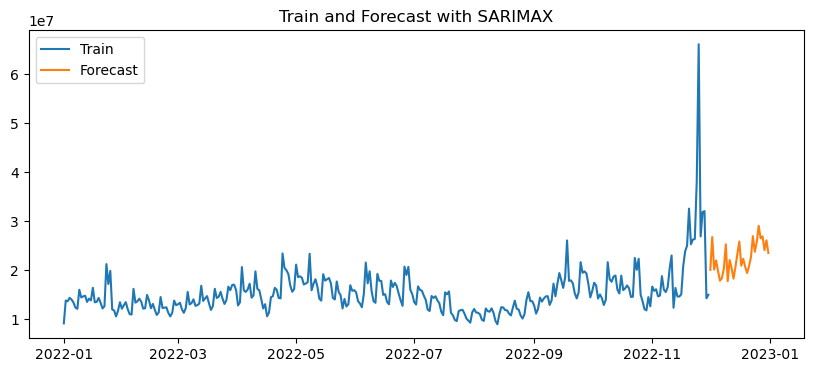

In [129]:
# Dat visulization 
plot_future(y['2022':],predictions, "SARIMAX")